## Exploratory Data Analysis (EDA) of the Kaggle Bike Sharing Dataset

In [35]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
bikes = pd.read_csv("./data/train.csv", parse_dates=True)
bikes.datetime = pd.to_datetime(bikes.datetime)
bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [37]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Extracting datetime-features from the timestamp-data

In [38]:
bikes["weekday"] = bikes["datetime"].dt.day_of_week
bikes["weekend"] = (bikes["weekday"] == 5) | (bikes["weekday"] == 6)
bikes["weekend"] = bikes["weekend"]*1
bikes["hour"] = bikes["datetime"].dt.hour
bikes["month"] = bikes["datetime"].dt.month
bikes["week"] = bikes["datetime"].dt.isocalendar().week
bikes["datum"] = bikes["datetime"].dt.date
count = bikes['count']
bikes.drop(labels=['count'], axis=1, inplace=True)
bikes.insert(0, 'count', count)
bikes.head(1)


,count,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,weekday,weekend,hour,month,week,datum
0,16,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,5,1,0,1,52,2011-01-01


In [39]:
bikes["year"] = bikes["datetime"].dt.year
year2012 = bikes.loc[bikes['year'] == 2012]
year2012.head(3)


,count,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,weekday,weekend,hour,month,week,datum,year
5422,48,2012-01-01 00:00:00,1,0,0,1,14.76,18.940,66,0.0000,5,43,6,1,0,1,52,2012-01-01,2012
5423,93,2012-01-01 01:00:00,1,0,0,1,14.76,17.425,66,8.9981,15,78,6,1,1,1,52,2012-01-01,2012
5424,75,2012-01-01 02:00:00,1,0,0,1,13.12,17.425,76,0.0000,16,59,6,1,2,1,52,2012-01-01,2012


In [40]:
year2012 = bikes.loc[bikes['year'] == 2012]
week20_2012 = year2012.loc[year2012["week"] == 20]
week20_2012.head()


,count,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,weekday,weekend,hour,month,week,datum,year
7551,35,2012-05-14 00:00:00,2,0,1,2,24.60,31.060,56,16.9979,21,14,0,0,0,5,20,2012-05-14,2012
7552,11,2012-05-14 01:00:00,2,0,1,2,24.60,30.305,60,19.0012,5,6,0,0,1,5,20,2012-05-14,2012
7553,2,2012-05-14 02:00:00,2,0,1,1,24.60,30.305,60,19.9995,1,1,0,0,2,5,20,2012-05-14,2012
7554,2,2012-05-14 03:00:00,2,0,1,2,23.78,27.275,68,22.0028,0,2,0,0,3,5,20,2012-05-14,2012
7555,6,2012-05-14 04:00:00,2,0,1,2,22.14,25.760,77,15.0013,3,3,0,0,4,5,20,2012-05-14,2012


In [41]:
week20_2012 = year2012.loc[year2012["week"] == 20]
week46_2012 = year2012.loc[year2012["week"] == 46]
day170512 = week20_2012.loc[week20_2012["weekday"] == 3]
day141112 = week46_2012.loc[week46_2012["weekday"] == 3]


## Correlation-plot of features

In [42]:
corr_plotdata = bikes.drop(["casual", "registered", "season", "weekday", "atemp", "year"], axis=1)
corr_plotdata.dtypes
corr_plotdata.tail(5)

,count,datetime,holiday,workingday,weather,temp,humidity,windspeed,weekend,hour,month,week,datum
10881,336,2012-12-19 19:00:00,0,1,1,15.58,50,26.0027,0,19,12,51,2012-12-19
10882,241,2012-12-19 20:00:00,0,1,1,14.76,57,15.0013,0,20,12,51,2012-12-19
10883,168,2012-12-19 21:00:00,0,1,1,13.94,61,15.0013,0,21,12,51,2012-12-19
10884,129,2012-12-19 22:00:00,0,1,1,13.94,61,6.0032,0,22,12,51,2012-12-19
10885,88,2012-12-19 23:00:00,0,1,1,13.12,66,8.9981,0,23,12,51,2012-12-19


<AxesSubplot:>

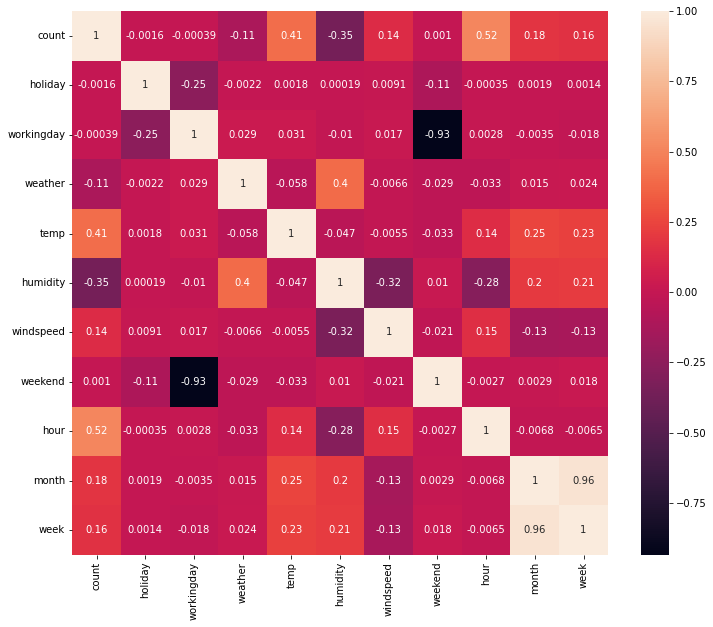

In [43]:
fig = plt.figure(figsize=(12, 10))
corr = corr_plotdata.corr(method='spearman')
sns.heatmap(data=corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='rocket',
            annot=True,
            )


## Other Visualizations

In [44]:
scplt_dta = year2012
scplt_dta.set_index("datetime", inplace=True)


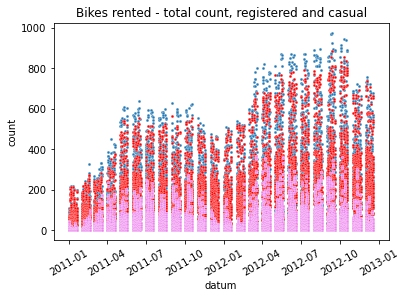

In [45]:
sns.scatterplot(x="datum", y="count",
                data=bikes, s=8)
sns.scatterplot(x="datum", y="registered",
                data=bikes, s=8, color="red")
sns.scatterplot(x="datum", y="casual",
                data=bikes, s=8, color="violet").set_title('Bikes rented - total count, registered and casual')
plt.xticks(rotation=30)
plt.savefig('./output/bikes_plot_all.png', dpi=300)


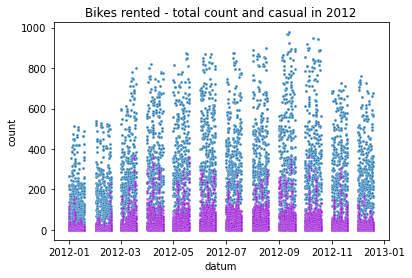

In [46]:
scplt_data = year2012
#scplt_data.set_index("date", inplace=True)
sns.scatterplot(x="datum", y="count",
                data=scplt_data, s=8)
#sns.scatterplot(x="date", y="registered",
#                data=scplt_data, color="red", s=8, alpha=0.6)
sns.scatterplot(x = "datum", y = "casual",
                data=scplt_data, color="darkviolet", s=8, alpha=0.6).set_title('Bikes rented - total count and casual in 2012')
plt.savefig('./output/bikes_plot_year.png', dpi=300)


In [47]:
lineplt_week_data = week20_2012
lineplt_week_data.set_index("datetime", inplace=True)
#lineplt_week_data.head()

In [48]:
workingdays2012 = year2012.loc[year2012['workingday'] == 1]
weekends2012 = year2012.loc[year2012['weekend'] == 1]
holidays2012 = year2012.loc[year2012['holiday'] == 1]


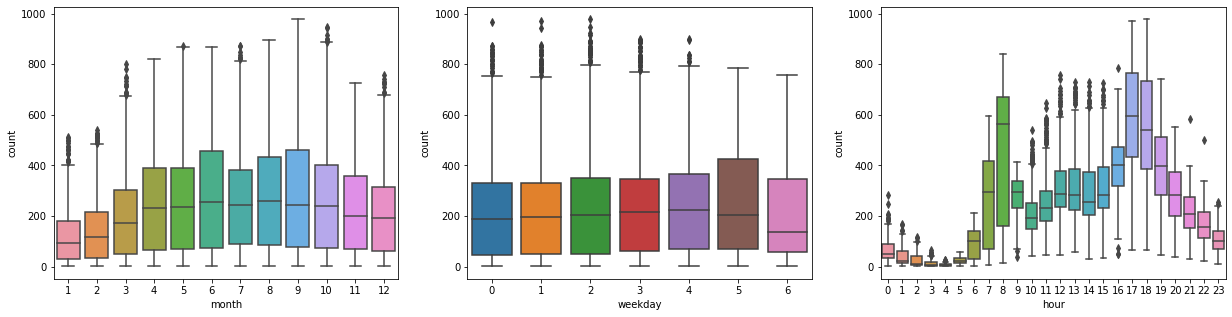

In [49]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(21, 5)
sns.boxplot(data=year2012, x='month', y='count', ax=ax1)
sns.boxplot(data=year2012, x='weekday', y='count', ax=ax2)
sns.boxplot(data=year2012, x='hour', y='count', ax=ax3)
plt.savefig('./output/bikes_boxplot_2012.png', dpi=300,
            facecolor='white', transparent=False)


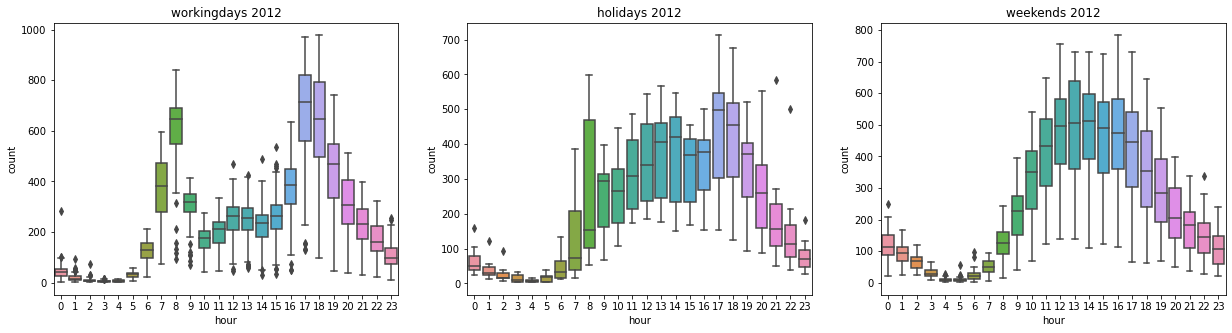

In [50]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(21, 5)
sns.boxplot(data=workingdays2012, x='hour', y='count',
            ax=ax1).set_title('workingdays 2012')
sns.boxplot(data=holidays2012, x='hour', y='count',
            ax=ax2).set_title('holidays 2012')
sns.boxplot(data=weekends2012, x='hour', y='count',
            ax=ax3).set_title('weekends 2012')
plt.savefig('./output/bikes_boxplot_2012_hours.png', dpi=300, facecolor='white', transparent=False)


In [51]:
workingdays = bikes.loc[bikes['workingday'] == 1]
weekends = bikes.loc[bikes['weekend'] == 1]
holidays = bikes.loc[bikes['holiday'] == 1]


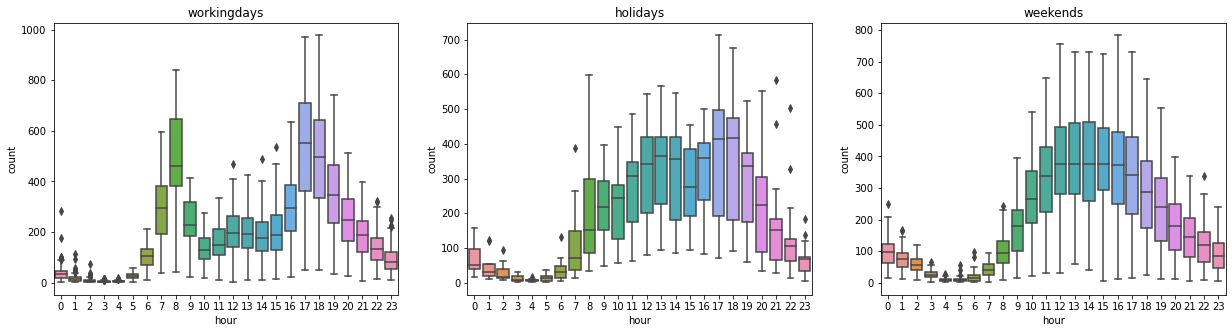

In [52]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(21, 5)
sns.boxplot(data=workingdays, x='hour', y='count',
            ax=ax1).set_title('workingdays')
sns.boxplot(data=holidays, x='hour', y='count',
            ax=ax2).set_title('holidays')
sns.boxplot(data=weekends, x='hour', y='count',
            ax=ax3).set_title('weekends')
plt.savefig('./output/bikes_boxplot_hours.png', dpi=300, facecolor='white', transparent=False)


<AxesSubplot:xlabel='hour', ylabel='count'>

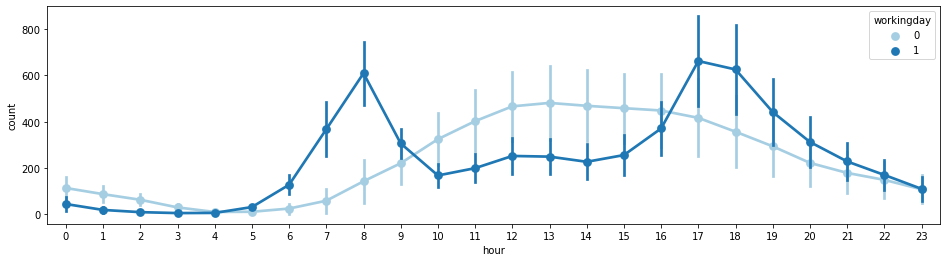

In [53]:
fig, (ax1) = plt.subplots(nrows=1)
fig.set_size_inches(16, 4)
sns.pointplot(data=year2012, x='hour', y='count', ci="sd",
              hue='workingday', ax=ax1, palette='Paired')


<AxesSubplot:xlabel='hour', ylabel='count'>

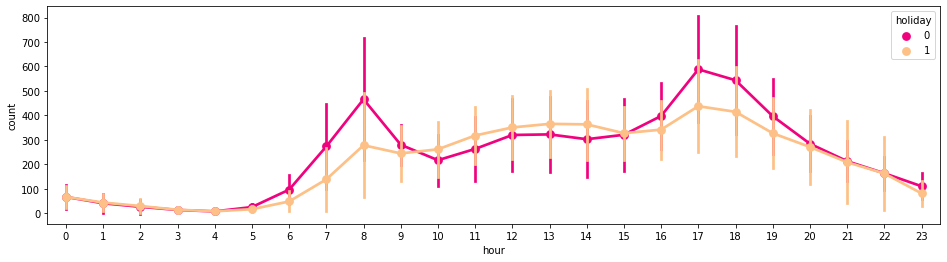

In [54]:
fig, (ax1) = plt.subplots(nrows=1)
fig.set_size_inches(16, 4)
sns.pointplot(data=year2012, x='hour', y='count', ci="sd",
              hue='holiday', ax=ax1, palette='Accent_r')


<AxesSubplot:xlabel='hour', ylabel='count'>

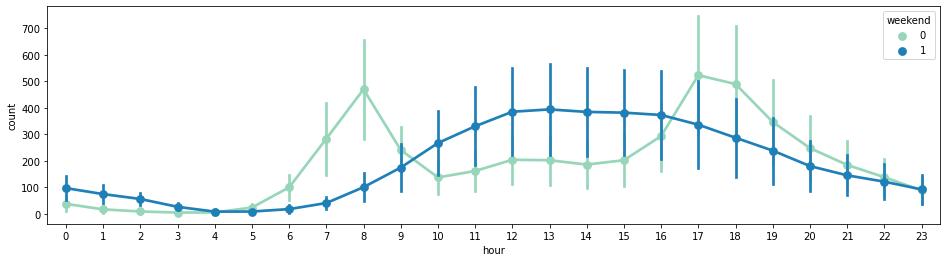

In [55]:
fig, (ax1) = plt.subplots(nrows=1)
fig.set_size_inches(16, 4)
sns.pointplot(data=bikes, x='hour', y='count', ci="sd",
              hue='weekend', ax=ax1, palette='YlGnBu')

In [56]:
lineplt_week_data = lineplt_week_data[[
    "temp", "casual", "registered", "humidity"]]
lineplt_week_data["temp"] = (lineplt_week_data["temp"]*5)
lineplt_week_data["registered"] = (lineplt_week_data["registered"]/5)
lineplt_week_data["casual"] = (lineplt_week_data["casual"]/2)

C:\Users\torst\AppData\Local\Temp\ipykernel_3496\1076237165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineplt_week_data["temp"] = (lineplt_week_data["temp"]*5)
C:\Users\torst\AppData\Local\Temp\ipykernel_3496\1076237165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineplt_week_data["registered"] = (lineplt_week_data["registered"]/5)
C:\Users\torst\AppData\Local\Temp\ipykernel_3496\1076237165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

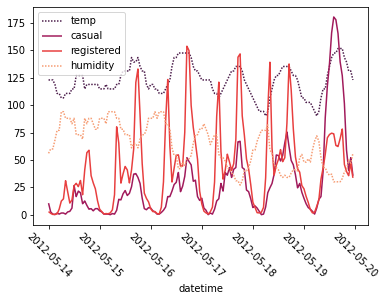

In [57]:
sns.lineplot(data=lineplt_week_data, palette="rocket", dashes=[
             (1, 1), (1, 0), (1, 0), (1, 1)])
plt.xticks( rotation=-45)
plt.savefig('bikes_plot_week.png', dpi=300)

In [58]:
lineplt_day_data = day170512
lineplt_day_data.set_index("hour", inplace=True)
lineplt_day_data = lineplt_day_data[[
    "temp", "casual", "registered", "humidity"]]
lineplt_day_data["temp"] = (lineplt_day_data["temp"]*4)
lineplt_day_data["registered"] = (lineplt_day_data["registered"]/5)
lineplt_day_data["casual"] = (lineplt_day_data["casual"]/2)


C:\Users\torst\AppData\Local\Temp\ipykernel_3496\2939458826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineplt_day_data["temp"] = (lineplt_day_data["temp"]*4)
C:\Users\torst\AppData\Local\Temp\ipykernel_3496\2939458826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineplt_day_data["registered"] = (lineplt_day_data["registered"]/5)
C:\Users\torst\AppData\Local\Temp\ipykernel_3496\2939458826.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

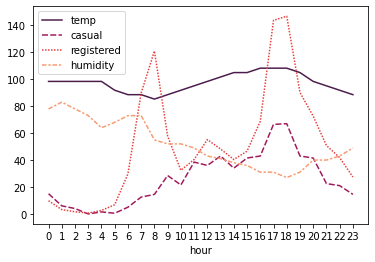

In [59]:
sns.lineplot(data=lineplt_day_data, palette="rocket")  # , dashes=[
#(1, 1), (1, 0), (1, 0)]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]) #rotation=-45
plt.savefig('bikes_plot_day.png', dpi=300)


In [60]:
lineplt2_day_data = day141112
lineplt2_day_data.set_index("hour", inplace=True)
lineplt2_day_data = lineplt2_day_data[[
    "temp", "casual", "registered", "humidity"]]
lineplt2_day_data["temp"] = (lineplt2_day_data["temp"]*4)
lineplt2_day_data["registered"] = (lineplt2_day_data["registered"]/5)
lineplt2_day_data["casual"] = (lineplt2_day_data["casual"]/2)


C:\Users\torst\AppData\Local\Temp\ipykernel_3496\3213569658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineplt2_day_data["temp"] = (lineplt2_day_data["temp"]*4)
C:\Users\torst\AppData\Local\Temp\ipykernel_3496\3213569658.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lineplt2_day_data["registered"] = (lineplt2_day_data["registered"]/5)
C:\Users\torst\AppData\Local\Temp\ipykernel_3496\3213569658.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

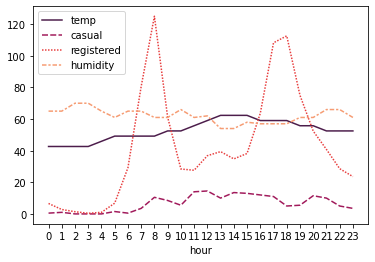

In [61]:
sns.lineplot(data=lineplt2_day_data, palette="rocket")  # , dashes=[
#(1, 1), (1, 0), (1, 0)]
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
           15, 16, 17, 18, 19, 20, 21, 22, 23])  # rotation=-45
plt.savefig('bikes_plot_day2.png', dpi=300)


### Conclusions for feature-engineering
- On workdays peek hours are around 8:00 and 18:00. Those hours will be featurized as "rushhours". 
- Also lunchtime may be worth featurizing.
- Night hours have generally low values and will be aggregated as "night".
- On non-workingdays the time between 10:00 and 18:00 is above average. It will be aggregated to "holidayhours" (only non-workingdays).
- "Weather" and "windspeed" can be dropped. 
- "Temp" and "humidity" are important indicators and remain in the dataframe.